In [1]:
# ----------------------------------------------------------------------------------------------------------------
# Build classifier models using Python to predict cryptocurrency transaction type.
# Author: Dr Nikhil Chandra Sarkar, Data Scientist & Fouder, Data Simulation Research Lab, NSW 2145, Australia
# https://www.dsrlab.com.au
# Email: nikhil_cs48@yahoo.com
# Version: v0.1
# Date: 13-11-2021
# ----------------------------------------------------------------------------------------------------------------

In [2]:
# First save the cryptocurrency transaction dataset to the current working directory
# To know current working directory
import os
os.getcwd()

'C:\\Users\\61470\\Desktop\\MachineLearning'

In [3]:
# Import required libraries for data processing, analysisng, visulaisation and building classifier model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [4]:
# Import cryptocurrency transaction dataset from the current working directory
# (Data source: order history from CoinSpot, https://www.coinspot.com.au)

data = pd.read_csv('orderhistory.csv')

# Take a look at the first couple of rows from loaded dataset
data.head(6)

,Transaction Date,Type,Market,Amount,Rate inc. fee,Rate ex. fee,Fee,Fee AUD (inc GST),GST AUD,Total AUD,Total (inc GST)
0,9/11/2021 12:32,Sell,UNI/AUD,28.760426,35.2800,35.636364,10.249169867999967 AUD,10.25,0.93,1014.67,1014.6678169319999 AUD
1,9/11/2021 5:58,Sell,LTC/AUD,14.266544,303.4600,306.525253,43.73055910305084 AUD,43.73,3.98,4329.33,4329.325351201999 AUD
2,8/11/2021 9:14,Sell,YFI/AUD,0.043338,46685.5500,47157.121210,20.437155966530327 AUD,20.44,1.86,2023.28,2023.2784406865 AUD
3,6/11/2021 22:18,Buy,YFI/AUD,0.043338,46147.4900,45690.589530,19.801584158415835 AUD,19.80,1.80,1999.96,1999.96 AUD
4,6/11/2021 22:17,Buy,LTC/AUD,7.345650,272.2700,269.574258,19.80198019801992 AUD,19.80,1.80,2000.00,2000.00 AUD
5,6/11/2021 22:16,Buy,SUSHI/AUD,61.673574,16.2144,16.054022,9.901089108910924 AUD,9.90,0.90,1000.01,1000.01 AUD


In [5]:
# See data types
data.dtypes

Transaction Date      object
Type                  object
Market                object
Amount               float64
Rate inc. fee        float64
Rate ex. fee         float64
Fee                   object
Fee AUD (inc GST)    float64
GST AUD              float64
Total AUD            float64
Total (inc GST)       object
dtype: object

In [6]:
# Rename some of the given column names in the dataset for convenient data exploration and analysis
data.rename(columns = {'Transaction Date':'Transaction_Date', 'Rate inc. fee':'Rate_incFee', 'Rate ex. fee':'Rate_exFee', 'Fee AUD (inc GST)':'FeeAUD_incGST',
                       'GST AUD':'GST_AUD', 'Total AUD':'Total_AUD', 
                       'Total (inc GST)':'Total_incGST'}, inplace = True)

# Take a look at the first couple of rows from data
data.head(6)

,Transaction_Date,Type,Market,Amount,Rate_incFee,Rate_exFee,Fee,FeeAUD_incGST,GST_AUD,Total_AUD,Total_incGST
0,9/11/2021 12:32,Sell,UNI/AUD,28.760426,35.2800,35.636364,10.249169867999967 AUD,10.25,0.93,1014.67,1014.6678169319999 AUD
1,9/11/2021 5:58,Sell,LTC/AUD,14.266544,303.4600,306.525253,43.73055910305084 AUD,43.73,3.98,4329.33,4329.325351201999 AUD
2,8/11/2021 9:14,Sell,YFI/AUD,0.043338,46685.5500,47157.121210,20.437155966530327 AUD,20.44,1.86,2023.28,2023.2784406865 AUD
3,6/11/2021 22:18,Buy,YFI/AUD,0.043338,46147.4900,45690.589530,19.801584158415835 AUD,19.80,1.80,1999.96,1999.96 AUD
4,6/11/2021 22:17,Buy,LTC/AUD,7.345650,272.2700,269.574258,19.80198019801992 AUD,19.80,1.80,2000.00,2000.00 AUD
5,6/11/2021 22:16,Buy,SUSHI/AUD,61.673574,16.2144,16.054022,9.901089108910924 AUD,9.90,0.90,1000.01,1000.01 AUD


In [7]:
# Data quality check - Remove duplicate data (True if a row is identical to a previous row)

print(data.duplicated())

# Drop duplicate rows if exist
data = data.drop_duplicates()

0     False
1     False
2     False
3     False
4     False
      ...  
87    False
88    False
89    False
90    False
91    False
Length: 92, dtype: bool


In [8]:
# Descriptive statistics - Summarise all numeric columns from the dataset
data.describe()

,Amount,Rate_incFee,Rate_exFee,FeeAUD_incGST,GST_AUD,Total_AUD
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,105.733526,9016.663802,8978.884533,18.262609,1.660326,1827.267391
std,296.655917,23004.381514,22898.837273,13.864030,1.260708,1369.912364
min,0.011946,0.495565,0.490658,0.100000,0.010000,10.000000
25%,3.079538,14.929600,14.859381,9.900000,0.900000,1000.000000
50%,56.156640,34.265000,34.265777,10.495000,0.950000,1039.025000
75%,89.833421,505.122500,502.758476,19.800000,1.800000,2000.002500
max,2017.898762,86173.710000,85617.878790,91.800000,8.350000,9088.190000


In [9]:
# Check the cryptocurrency transaction 'Type' distribution from the dataset
data.groupby('Type').size()

Type
Buy     65
Sell    27
dtype: int64

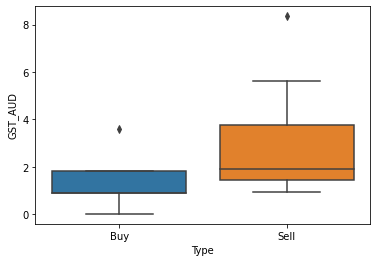

In [10]:
# Boxplots - Graphical method of displaying variation in data
fn = ['Amount','Rate_incFee', 'Rate_exFee', 'FeeAUD_incGST', 'GST_AUD','Total_AUD']
cn = ['Buy', 'Sell']

sns.boxplot(x = 'Type', y = 'GST_AUD', data = data,  order = cn);

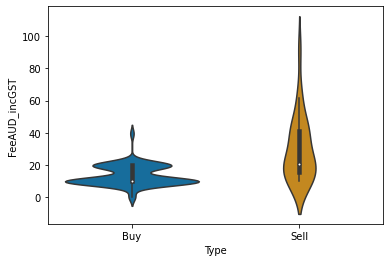

In [11]:
# Violin plots: To visualise the distribution of numerical data of a variable from the dataset

sns.violinplot(x = 'Type', y = 'FeeAUD_incGST', data=data, size=5, order = cn, palette = 'colorblind');

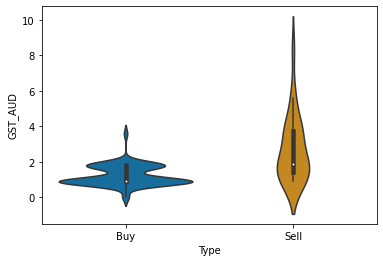

In [12]:
# Violin plots: To visualise the distribution of numerical data of a variable from the dataset

sns.violinplot(x = 'Type', y = 'GST_AUD', data=data, size=5, order = cn, palette = 'colorblind');

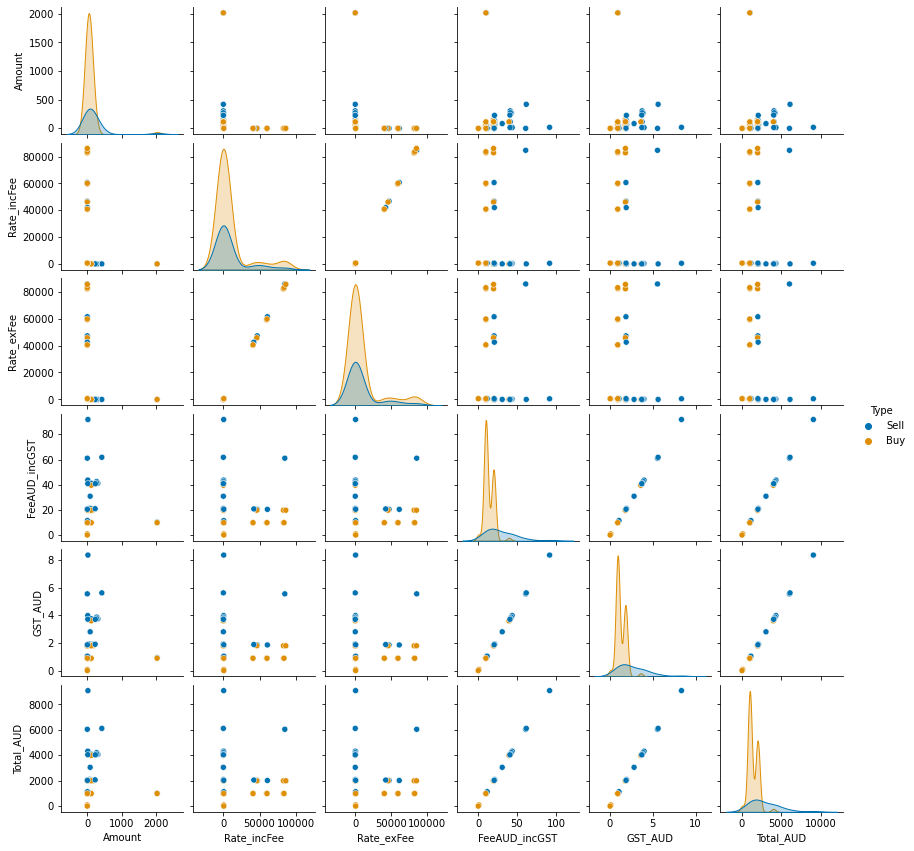

In [13]:
# Bivariate relationship: scatterplot matrix

sns.pairplot(data, hue="Type", height = 2, palette = 'colorblind');

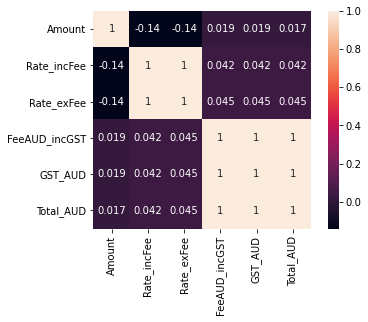

In [14]:
# Correlation matrix to examine the relationship between variables from dataset

corrmat = data.corr()
sns.heatmap(corrmat, annot = True, square = True);

C:\Users\61470\anaconda3\instalation\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


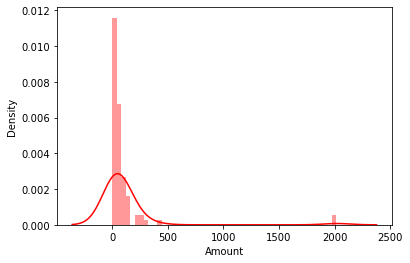

In [15]:
# Univariate Analysis - Probabilty distribution of a selected variable from data

sns.distplot(data.Amount, color = 'red')
plt.show()

C:\Users\61470\anaconda3\instalation\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\61470\anaconda3\instalation\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


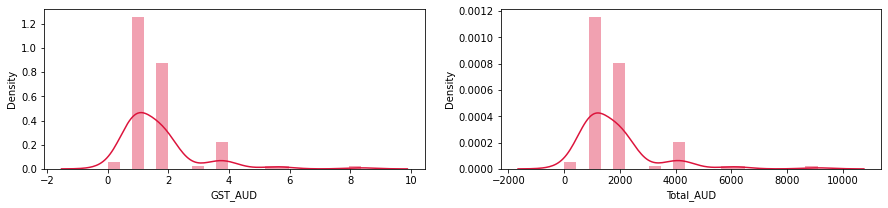

In [16]:
# Univariate Analysis - Probabilty distribution of selected variables from data
plt.figure(figsize = (15,10))
feature = data.columns[8:10]
for i in enumerate(feature):
    plt.subplot(3,2, i[0]+1)
    sns.distplot(data[i[1]], color='crimson')

In [17]:
# split the data into train and test data

train, test = train_test_split(data, random_state=0, test_size=0.3)


In [18]:
# Take a look at the top of train dataset
train.head(5)

,Transaction_Date,Type,Market,Amount,Rate_incFee,Rate_exFee,Fee,FeeAUD_incGST,GST_AUD,Total_AUD,Total_incGST
81,2/09/2021 7:20,Buy,XLM/AUD,2017.898762,0.495565,0.490658,9.90099009900996 AUD,9.90,0.90,1000.00,1000.00 AUD
84,31/08/2021 23:27,Sell,COMP/AUD,3.369971,603.440000,609.535354,20.541165746052457 AUD,20.54,1.87,2033.58,2033.5754088592 AUD
3,6/11/2021 22:18,Buy,YFI/AUD,0.043338,46147.490000,45690.589530,19.801584158415835 AUD,19.80,1.80,1999.96,1999.96 AUD
71,7/09/2021 20:03,Buy,SNX/AUD,55.672158,17.962300,17.784455,9.90099009900996 AUD,9.90,0.90,1000.00,1000.00 AUD
82,2/09/2021 5:52,Sell,OMG/AUD,227.160314,9.139700,9.232020,20.97148604621725 AUD,20.97,1.91,2076.18,2076.177118575508 AUD


In [19]:
# Take a look at the bottom of the train dataset
train.tail(5)

,Transaction_Date,Type,Market,Amount,Rate_incFee,Rate_exFee,Fee,FeeAUD_incGST,GST_AUD,Total_AUD,Total_incGST
88,31/08/2021 3:07,Sell,COMP/AUD,1.889336,605.5700,611.686869,11.556819972699031 AUD,11.56,1.05,1144.13,1144.1251772972 AUD
67,24/09/2021 10:09,Buy,UNI/AUD,65.082981,30.7300,30.425743,19.80198019801992 AUD,19.80,1.80,2000.00,2000.00 AUD
64,26/09/2021 22:30,Buy,OMG/AUD,80.166747,12.4740,12.350495,9.90099009900996 AUD,9.90,0.90,1000.00,1000.00 AUD
47,2/10/2021 9:26,Buy,SUSHI/AUD,64.639570,15.4704,15.317228,9.90099009900996 AUD,9.90,0.90,1000.00,1000.00 AUD
44,4/10/2021 9:17,Buy,SNX/AUD,65.074934,15.3669,15.214752,9.90099009900996 AUD,9.90,0.90,1000.00,1000.00 AUD


In [20]:
# Take a look at the top of test dataset
test.head(5)

,Transaction_Date,Type,Market,Amount,Rate_incFee,Rate_exFee,Fee,FeeAUD_incGST,GST_AUD,Total_AUD,Total_incGST
2,8/11/2021 9:14,Sell,YFI/AUD,0.043338,46685.5500,47157.121210,20.437155966530327 AUD,20.44,1.86,2023.28,2023.2784406865 AUD
33,17/10/2021 22:55,Sell,SUSHI/AUD,269.882696,15.6084,15.766061,42.54986946550525 AUD,42.55,3.87,4212.44,4212.437077085004 AUD
22,27/10/2021 17:15,Sell,SNX/AUD,420.248531,14.5603,14.707374,61.807522143234564 AUD,61.81,5.62,6118.94,6118.944692180229 AUD
16,2/11/2021 21:14,Sell,COMP/AUD,18.580325,489.1300,494.070707,91.79994493159757 AUD,91.80,8.35,9088.19,9088.1945482281 AUD
13,4/11/2021 10:37,Buy,COMP/AUD,3.744547,534.1100,528.821783,19.80198019801992 AUD,19.80,1.80,2000.00,2000.00 AUD


In [21]:
# Take a look at the bottom of the test dataset
test.tail(5)

,Transaction_Date,Type,Market,Amount,Rate_incFee,Rate_exFee,Fee,FeeAUD_incGST,GST_AUD,Total_AUD,Total_incGST
43,4/10/2021 10:51,Buy,SNX/AUD,65.264779,15.3222,15.170495,9.90099009900996 AUD,9.90,0.90,1000.00,1000.00 AUD
77,6/09/2021 17:00,Sell,SNX/AUD,231.792107,17.4334,17.609495,40.81741943184352 AUD,40.82,3.71,4040.92,4040.924523752488 AUD
74,6/09/2021 23:07,Buy,COMP/AUD,1.440320,694.2900,687.415845,9.90099009900996 AUD,9.90,0.90,1000.00,1000.00 AUD
56,28/09/2021 11:28,Buy,SUSHI/AUD,69.836791,14.3191,14.177327,9.90099009900996 AUD,9.90,0.90,1000.00,1000.00 AUD
75,6/09/2021 23:04,Buy,LTC/AUD,6.431489,310.9700,307.891090,19.80198019801992 AUD,19.80,1.80,2000.00,2000.00 AUD


In [22]:
# Start to Build Classifier Model
# Split training dataset in features and target variable
feature_cols = fn
X_train = train[feature_cols] # Features- Indipendent variables
y_train = train.Type # Target variable - Dependent variable

#Split test dataset in features and target variable
feature_cols = fn
X_test = test[feature_cols] # Features- Indipendent variables
y_test = test.Type # Target variable - Dependent variable

In [23]:
# First consider Decision Tree Classifier
mod_dt = DecisionTreeClassifier(max_depth = 10, random_state = 15)

# Train Decision Tree Classifer
mod_dt.fit(X_train,y_train)

# Predict the response for test dataset
prediction=mod_dt.predict(X_test)

# Model Accuracy
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 1.000


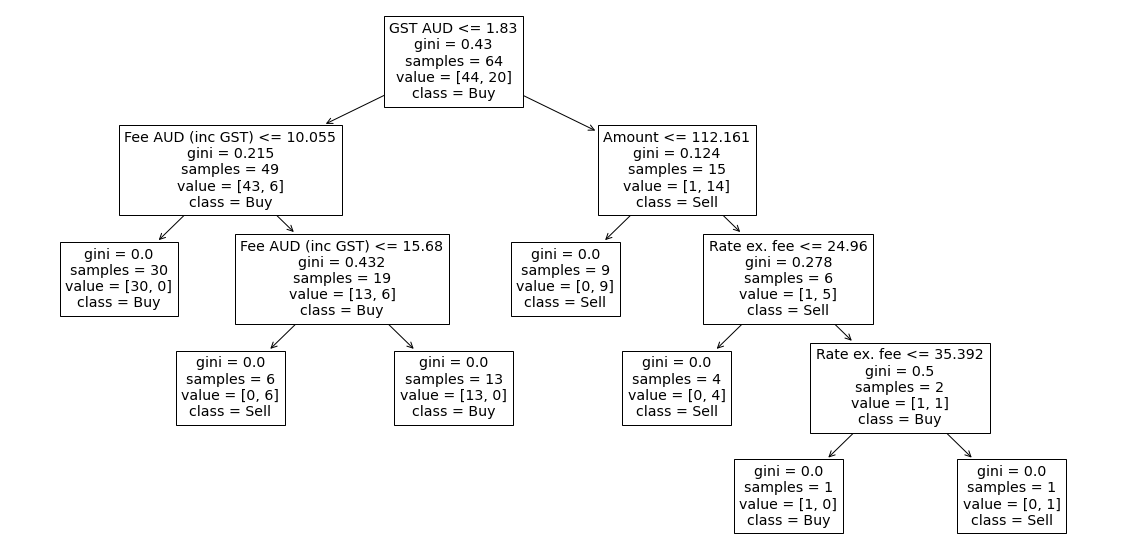

In [24]:
# Visualise the classification rules
# set figure size

fn = ['Amount','Rate inc. fee', 'Rate ex. fee', 'Fee AUD (inc GST)', 'GST AUD']
cn = ['Buy', 'Sell']
plt.figure(figsize = (20,10))
#plt.figure()
graph = plot_tree(mod_dt,feature_names = fn, class_names = cn, filled = False);

In [25]:
# Importance of each predictor

mod_dt.feature_importances_

array([0.00727273, 0.        , 0.06060606, 0.38293135, 0.54918986,
       0.        ])

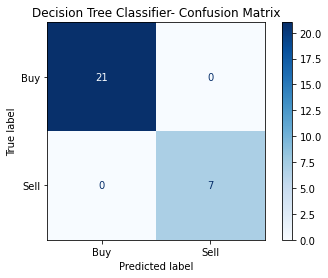

In [26]:
# Confusion martix: show the prediction results from Decision Tree Classifier

disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                    display_labels = cn,
                                    cmap = plt.cm.Blues,
                                    normalize = None)

disp.ax_.set_title('Decision Tree Classifier- Confusion Matrix');

In [27]:
# Second model: Guassian Naive Bayes Classifier

mod_gnb_all = GaussianNB()

y_pred = mod_gnb_all.fit(X_train, y_train).predict(X_test)

print('The accuracy of the Gussain Naive Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))


The accuracy of the Gussain Naive Classifier on test data is 0.821


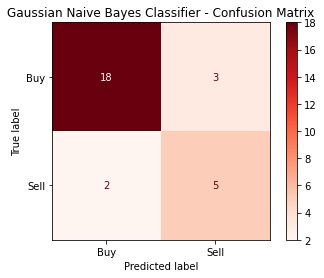

In [28]:
# Confusion martix: show the prediction results

disp = metrics.plot_confusion_matrix(mod_gnb_all, X_test, y_test,
                                    display_labels = cn,
                                    cmap = plt.cm.Reds,
                                    normalize = None)
disp.ax_.set_title('Gaussian Naive Bayes Classifier - Confusion Matrix');


In [29]:
# Third Model: Logistic Regression Classifier

mod_lg = LogisticRegression()
mod_lg.fit(X_train, y_train)
y_pred = mod_lg.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print('The accuracy of the Logistic Regression is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))


The accuracy of the Logistic Regression is 0.964


C:\Users\61470\anaconda3\instalation\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


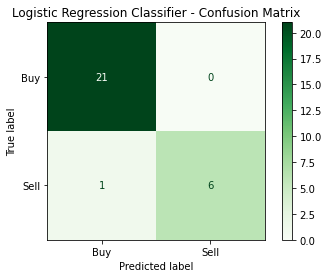

In [30]:
# Confusion martix: show the prediction results

disp = metrics.plot_confusion_matrix(mod_lg, X_test, y_test,
                                    
                                    display_labels = cn,
                                    cmap = plt.cm.Greens,
                                    normalize = None)
disp.ax_.set_title('Logistic Regression Classifier - Confusion Matrix');



In [193]:
# The End